In [2]:
######################
# Imports de modules #
######################

import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings("error")

# Partie 1

## Question 1

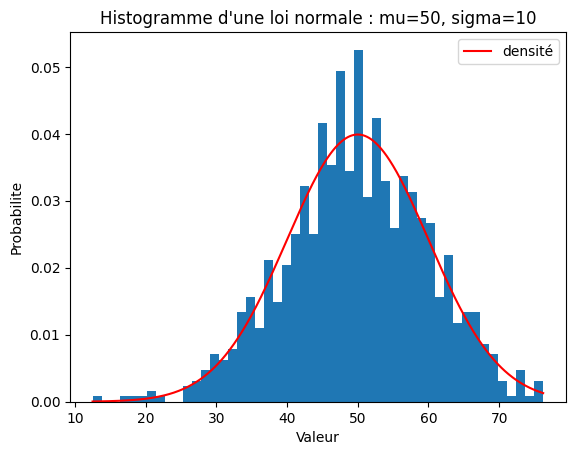

In [5]:
mu = 50  # moyenne
sigma = 10  # écart-type
num_bins = 50  # Nombre de colonnes pour l'histogramme
x = mu + sigma * np.random.randn(1000)
plt.hist(x, num_bins, density=True)
plt.xlabel("Valeur")
plt.ylabel("Probabilite")
plt.title(f"Histogramme d'une loi normale : mu={mu}, sigma={sigma}")


# crée un tableau NumPy (absc) contenant des valeurs espacées de 0.1 à travers la plage des valeurs minimales à
# maximales d'échantillon x. Cela est utilisé pour générer une séquence de valeurs en abscisse pour votre courbe de densité de probabilité.
# x.min() renvoie la valeur minimale de votre échantillon x.
# x.max() renvoie la valeur maximale de votre échantillon x.
# np.arange(start, stop, step) crée un tableau de valeurs espacées régulièrement entre start et stop avec un espacement défini par step.
absc = np.arange(x.min(), x.max(), 0.1)
plt.plot(
    absc,
    (1 / np.sqrt(2 * np.pi * (sigma**2)))
    * np.exp(-(((absc - mu) ** 2) / (2 * (sigma**2)))),
    color="red",
    label="densité",
)

plt.legend()
plt.show()

## Question 2

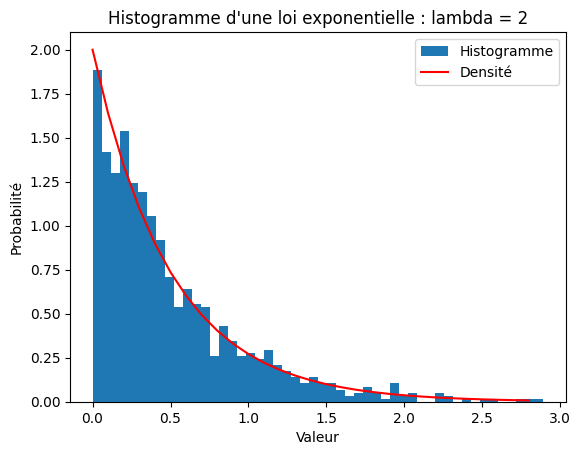

In [12]:
l = 2  # Paramètre de la loi exponentielle
nb_épreuves = 1000 # Nombre de réalisation
x = np.random.exponential(1 / l, nb_épreuves)
num_bins = 50  # Nombre de colonnes pour l'histogramme

# Création de l'histogramme
plt.hist(x, num_bins, density=True, label="Histogramme")
plt.xlabel("Valeur")
plt.ylabel("Probabilité")
plt.title(f"Histogramme d'une loi exponentielle : lambda = {l}")

# Création de la courbe de densité de probabilité de la loi exponentielle
absc = np.arange(x.min(), x.max(), 0.1)
plt.plot(absc, l * np.exp(-l * absc), color="red", label="Densité")

plt.legend()
plt.show()

# Partie 2

In [ ]:
système =

def gauss_elimination(A, B):
    """
        A: Matrice
        B: Vecteur
        Return: Vecteur solution
    """


# Partie 3

In [11]:
P = np.array([[0.5, 0.5], [0.3, 0.7]])


def gauss_jordan_exact(A):
    # Simplification exacte des éléments de la matrice A
    A = np.array(
        [[sy.nsimplify(A[i, j]) for j in range(len(A[i]))] for i in range(len(A))]
    )

    # Boucle principale pour effectuer l'algorithme de Gauss-Jordan
    for i in range(len(A)):
        # Échange de lignes si l'élément diagonal est nul
        if A[i, i] == 0:
            # Chercher une ligne non nulle en dessous
            j = i + 1
            # Si une ligne non nulle est trouvée en dessous
            while (j < len(A)) and (A[j, i] == 0):
                j += 1
                # Ajouter la ligne trouvée à la ligne actuelle pour éviter le 0 sur la diagonale            if j < len(A):
                A[i, :] = A[i, :] + A[j, :]
            else:
                continue

        # Normalisation de la ligne pour que l'élément diagonal soit égal à 1
        c = A[i, i]
        A[i, :] = A[i, :] / c

        # Élimination des autres éléments dans la colonne
        for j in range(len(A)):
            if j != i:
                c = (
                    -A[j, i] / A[i, i]
                )  # le coef qui annule le coeff de la ligne j dans la colonne i
                A[j, :] = (
                    A[j, :] + c * A[i, :]
                )  # On ajoute a la ligne j la ligne i * par le coeff

    # Retourne la matrice résultante après l'algorithme de Gauss-Jordan
    return A


def is_stochastique_matrix(M):
    """
        M: Matrice
        Return: boolean retourne vrai si la matrice M est une matrice de transition, sinon retourne faux
    """
    return (
        (M.shape[0] == M.shape[1]) and ((M <= 1).all()) and ((M.sum(axis=1) == 1).all())
    )


def stationary_mesure(P):
    """
        P: Matrice
        Return: mesure invariante de P
    """

    sol = -gauss_jordan_exact(P.T - np.eye(P.shape[0]))[:, -1]

    # Ajuster la dernière composante pour garantir que la somme soit égale à 1
    sol[-1] = 1

    # Normaliser le vecteur pour qu'il représente une mesure de probabilité valide
    sol = sol / sol.sum()

    # Retourner la mesure invariante
    return sol


def asymptotic_mesure(P):
    # Transposer la matrice P
    P = P.T

    mu = np.array([[1], [0]])

    # Calculer le produit matriciel P * mu
    mu_temp = P.dot(mu)

    # Répéter le processus jusqu'à ce que mu soit suffisamment proche de mu_temp
    while not np.isclose(mu, mu_temp, atol=10 ** (-3)).all():
        # Copier mu_temp dans mu
        mu = mu_temp.copy()

        # Mettre à jour mu_temp avec le nouveau produit matriciel P * mu
        mu_temp = P.dot(mu)

    # Retourner mu arrondi à trois décimales
    return np.round(mu, 3)


print(f"Matrice P : \n{P}")
if is_stochastique_matrix(P):
  mesure_invariante = stationary_mesure(P)
  mesure_asymptotique = asymptotic_mesure(P)
  print(f"La mesure invariante de ma matrice P est {mesure_invariante}")
  print(f"La mesure asymptotique empirique de la matrice P est {mesure_asymptotique}")

Matrice P : 
[[0.5 0.5]
 [0.3 0.7]]
La mesure invariante de ma matrice P est [3/8 5/8]
La mesure asymptotique empirique de la matrice P est [[0.376]
 [0.624]]
